## UK Traffic Accidents - EDA

In [1]:
# essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid", {"axes.axisbelow": False})

In [3]:
# read and concatenate the datasets
first_data = pd.read_csv("accidents_2005_to_2007.csv")
second_data = pd.read_csv("accidents_2009_to_2011.csv")
third_data = pd.read_csv("accidents_2012_to_2014.csv")

data = pd.concat([first_data, second_data, third_data])
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,1504049.0,439621.405078,95116.160326,64950.000000,375060.000000,439960.000000,523060.000000,6.553700e+05
Location_Northing_OSGR,1504049.0,300158.403995,161008.382735,10290.000000,178260.000000,268830.000000,398151.000000,1.208800e+06
Longitude,1504049.0,-1.436625,1.398078,-7.516225,-2.373902,-1.403714,-0.221510,1.759398e+00
Latitude,1504049.0,52.589399,1.449889,49.912941,51.490156,52.309126,53.478581,6.075754e+01
Police_Force,1504150.0,30.205364,25.516033,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,1504150.0,2.838190,0.401842,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,1504150.0,1.831606,0.714759,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,1504150.0,1.350960,0.825335,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,1504150.0,4.118607,1.924405,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),1504150.0,347.614855,259.429163,1.000000,110.000000,322.000000,518.000000,9.410000e+02


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1504150

In [6]:
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [7]:
# choosing columns
df = data.loc[:, ["Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties",
				  "Date", "Day_of_Week", "Time", "Road_Type", "Speed_limit",
				  "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions",
				  "Urban_or_Rural_Area", "Year"]]

df.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,04/01/2005,3,17:42,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,05/01/2005,4,17:36,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,06/01/2005,5,00:15,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,07/01/2005,6,10:35,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,10/01/2005,2,21:13,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 0 to 464696
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Accident_Severity        1504150 non-null  int64 
 1   Number_of_Vehicles       1504150 non-null  int64 
 2   Number_of_Casualties     1504150 non-null  int64 
 3   Date                     1504150 non-null  object
 4   Day_of_Week              1504150 non-null  int64 
 5   Time                     1504033 non-null  object
 6   Road_Type                1504150 non-null  object
 7   Speed_limit              1504150 non-null  int64 
 8   Light_Conditions         1504150 non-null  object
 9   Weather_Conditions       1504024 non-null  object
 10  Road_Surface_Conditions  1502192 non-null  object
 11  Urban_or_Rural_Area      1504150 non-null  int64 
 12  Year                     1504150 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 160.7+ MB


In [9]:
df.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [10]:
df.dropna(inplace= True)

In [11]:
df.shape

(1501957, 13)

In [12]:
df.Date.head(10)

0    04/01/2005
1    05/01/2005
2    06/01/2005
3    07/01/2005
4    10/01/2005
5    11/01/2005
6    13/01/2005
7    14/01/2005
8    15/01/2005
9    15/01/2005
Name: Date, dtype: object

In [13]:
# divide Date into Day and Month
months = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
		  7: "July", 8: "August", 9: "September", 10: "Oktober", 11: "November", 12: "December"}

days = {1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday",
		6: "Saturday", 7: "Sunday"}

df["Day"] = df.Date.apply(lambda x: str(x).split('/')[0]).values.astype("int64")
df["Month"] = df.Date.apply(lambda x: str(x).split('/')[1]).values.astype("int64")

df.Month = df.Month.apply(lambda x: months[x])
df.Day_of_Week = df.Day_of_Week.apply(lambda x: days[x])

df.drop({"Date"}, axis= 1, inplace= True)

In [14]:
df.loc[:, ["Day", "Month"]].head()

,Day,Month
0,4,January
1,5,January
2,6,January
3,7,January
4,10,January


In [15]:
df.Day_of_Week.head()

0    Wednesday
1     Thursday
2       Friday
3     Saturday
4      Tuesday
Name: Day_of_Week, dtype: object

In [17]:
# divide Time into Hour
df["Hour"] = df.Time.apply(lambda x: str(x).split(':')[0]).values.astype("int64")
df.drop({"Time"}, axis= 1, inplace= True)

In [18]:
df.Hour.head()

0    17
1    17
2     0
3    10
4    21
Name: Hour, dtype: int64

### Visualization

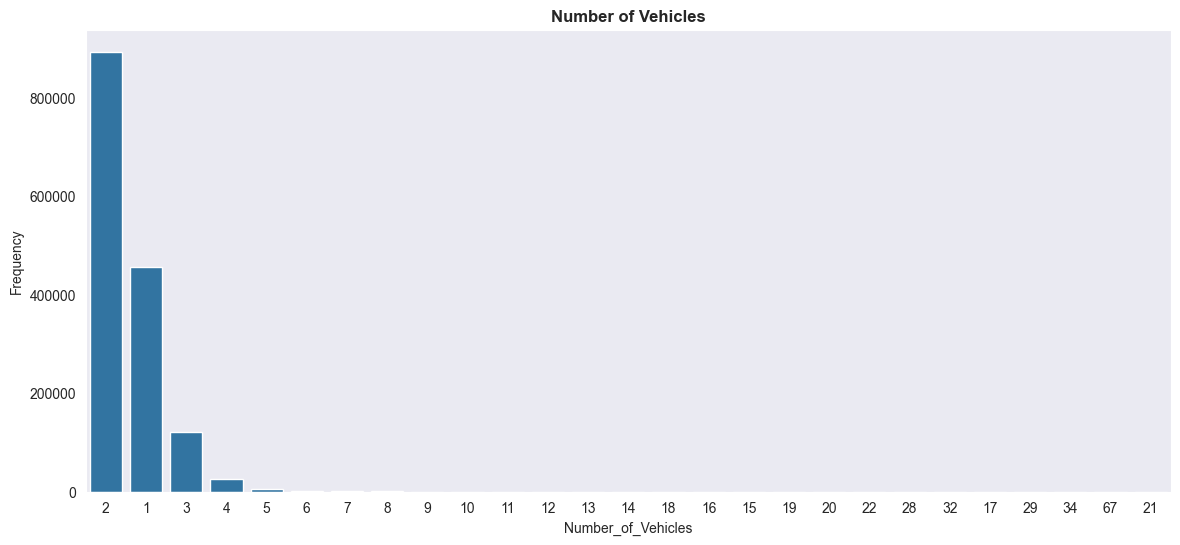

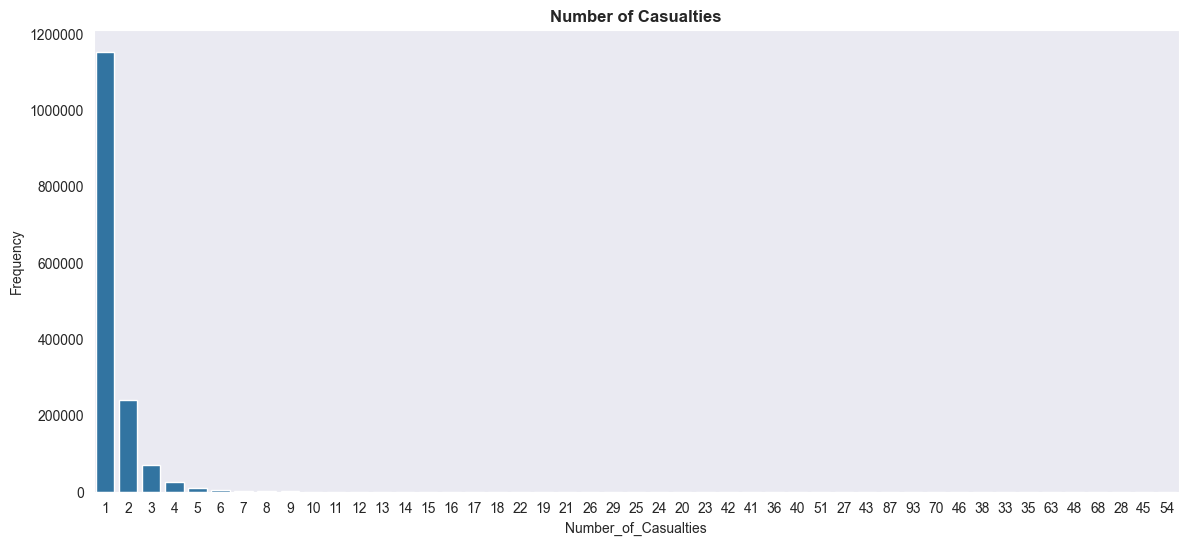

In [23]:
for column in ["Number_of_Vehicles", "Number_of_Casualties"]:
	var_value = df[column].value_counts()

	plt.figure(figsize=(14, 6))
	plt.grid(False)

	sns.barplot(x= var_value.index, y= var_value, order=var_value.index)

	plt.title(" ".join(column.split('_')), weight= "bold")
	plt.ylabel("Frequency")
	plt.ticklabel_format(style= "plain", axis= 'y')


In [24]:
def categorization(value):
	if value == 1:
		return "1"
	elif value == 2:
		return "2"
	elif value == 3:
		return "3"
	elif 4 <= value <= 10:
		return "4-10"
	else:
		return "More than 10"

df.Number_of_Vehicles = df.Number_of_Vehicles.apply(categorization)
df.Number_of_Casualties = df.Number_of_Casualties.apply(categorization)

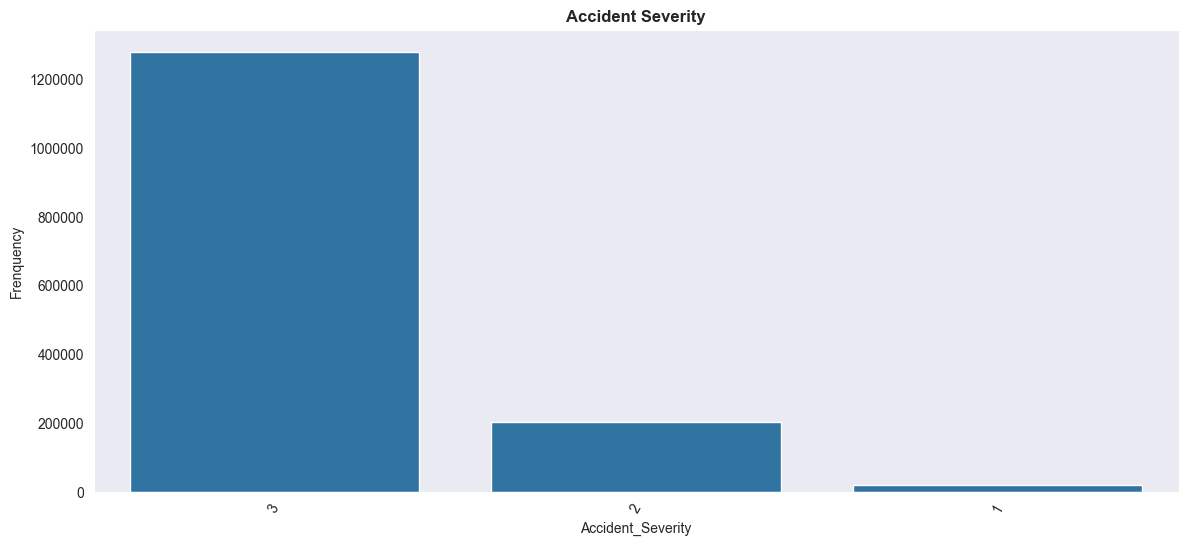

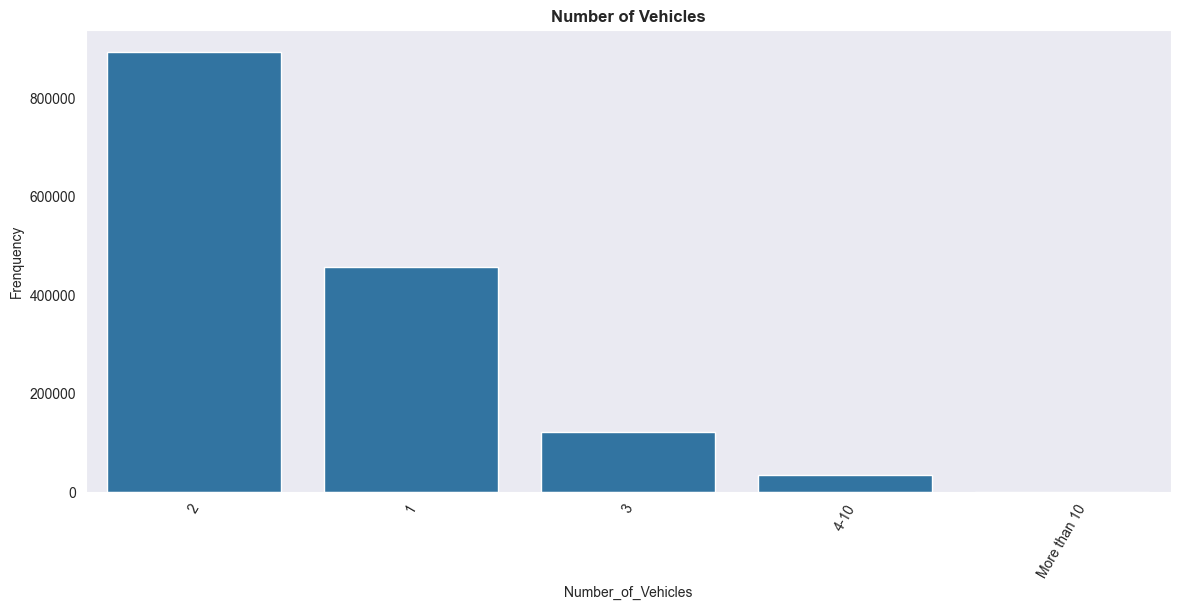

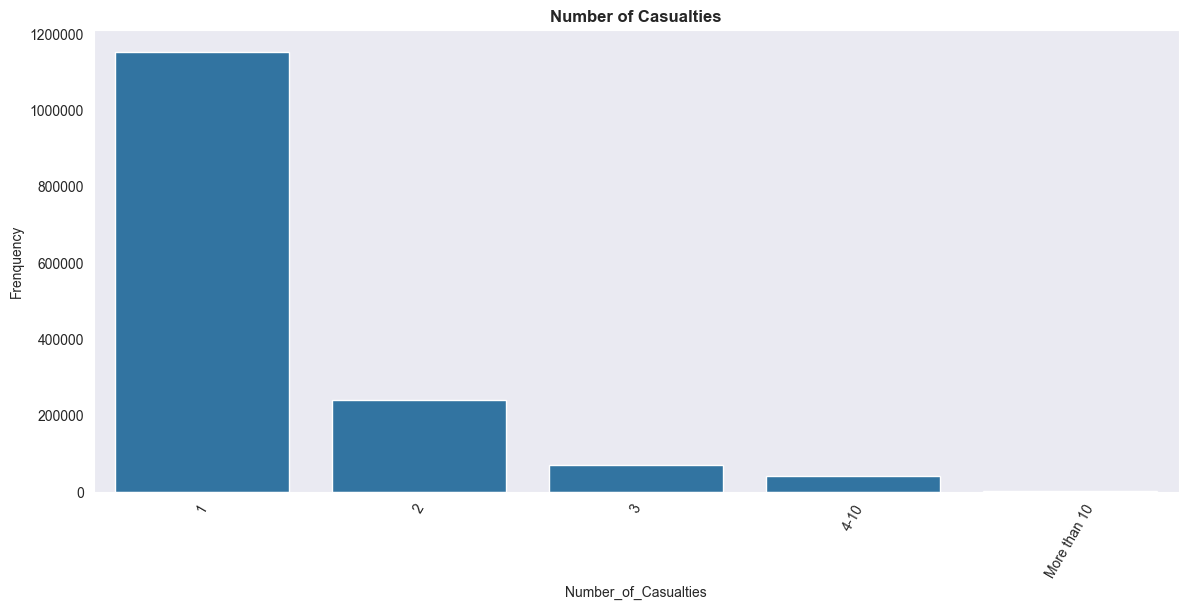

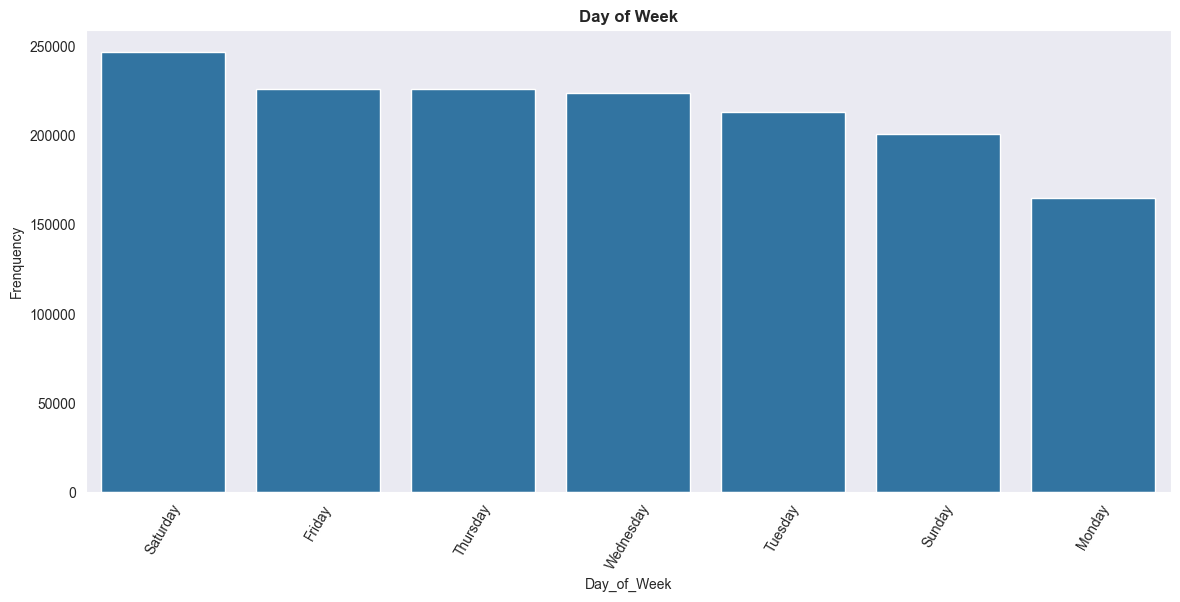

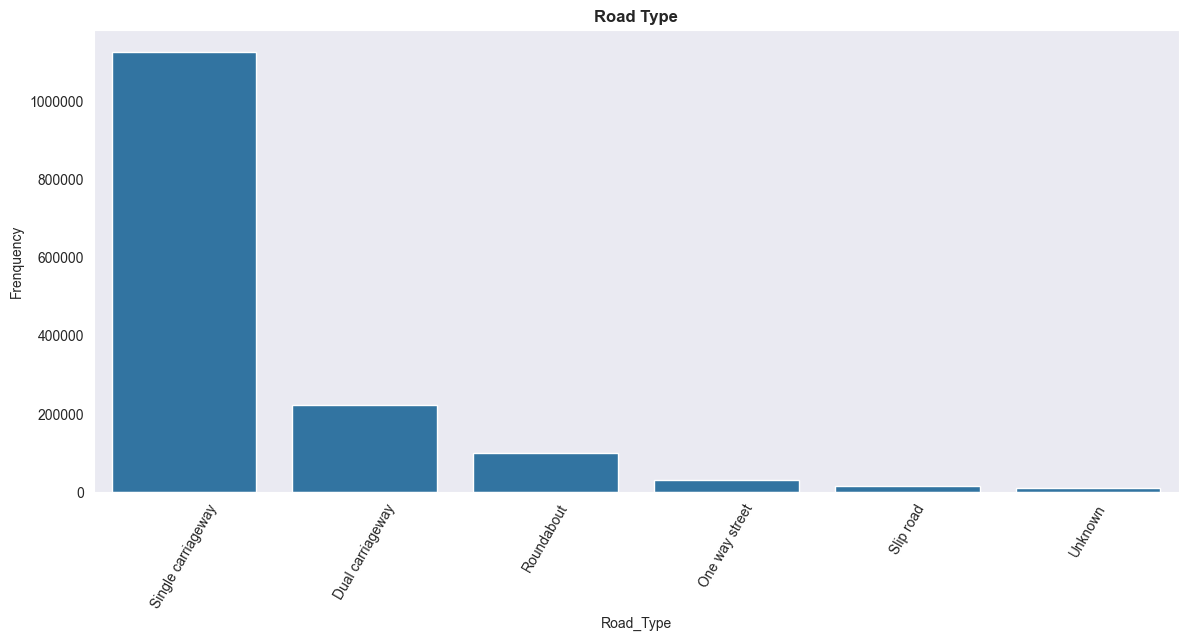

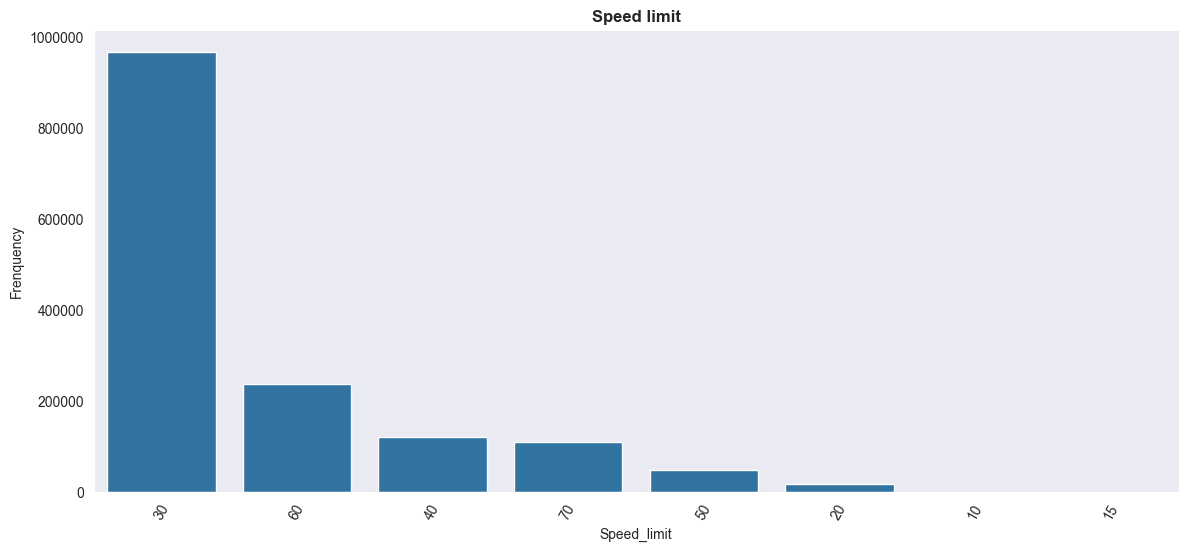

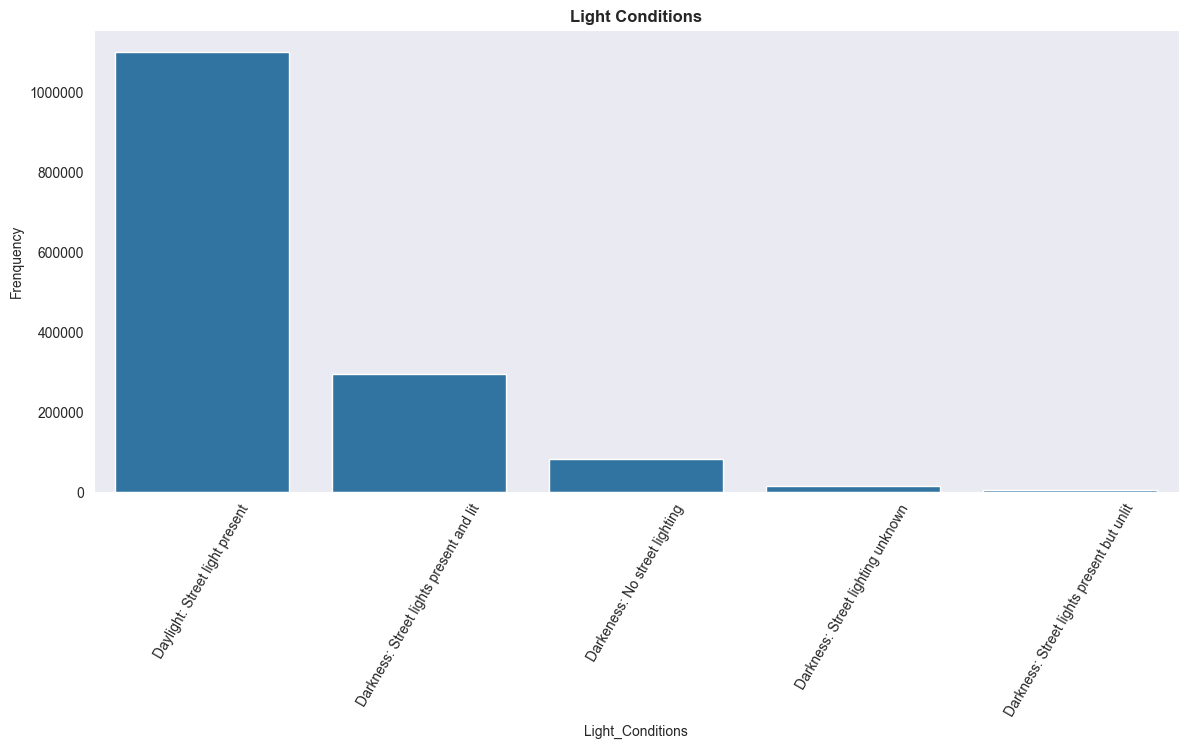

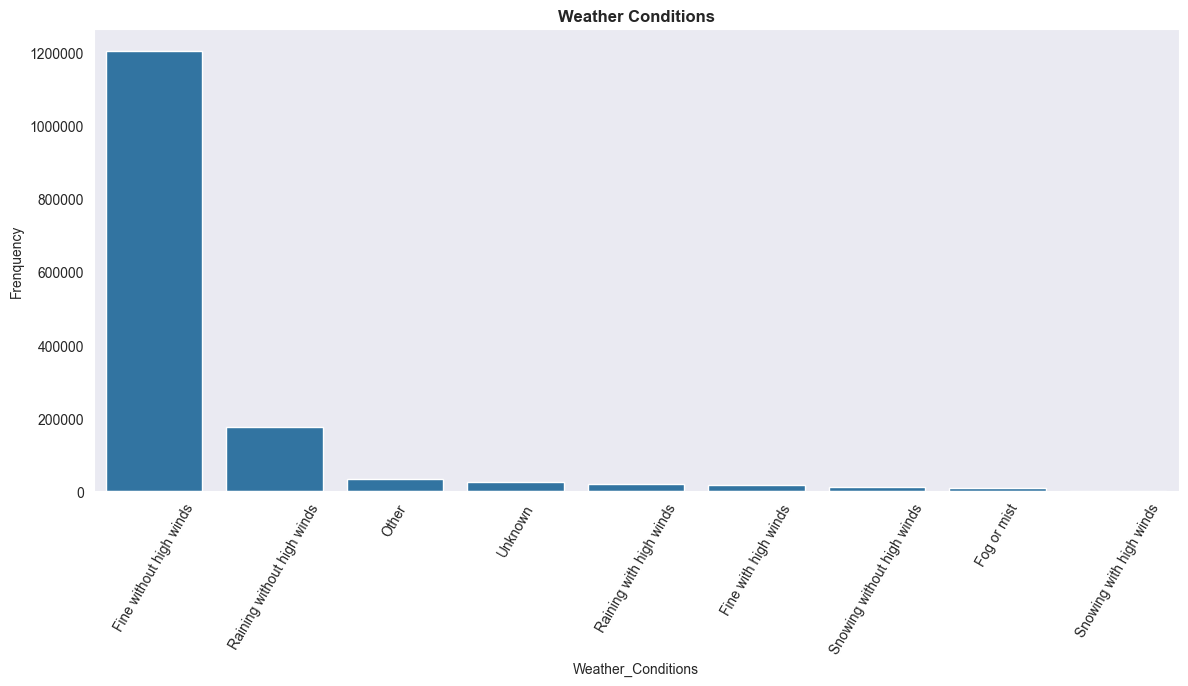

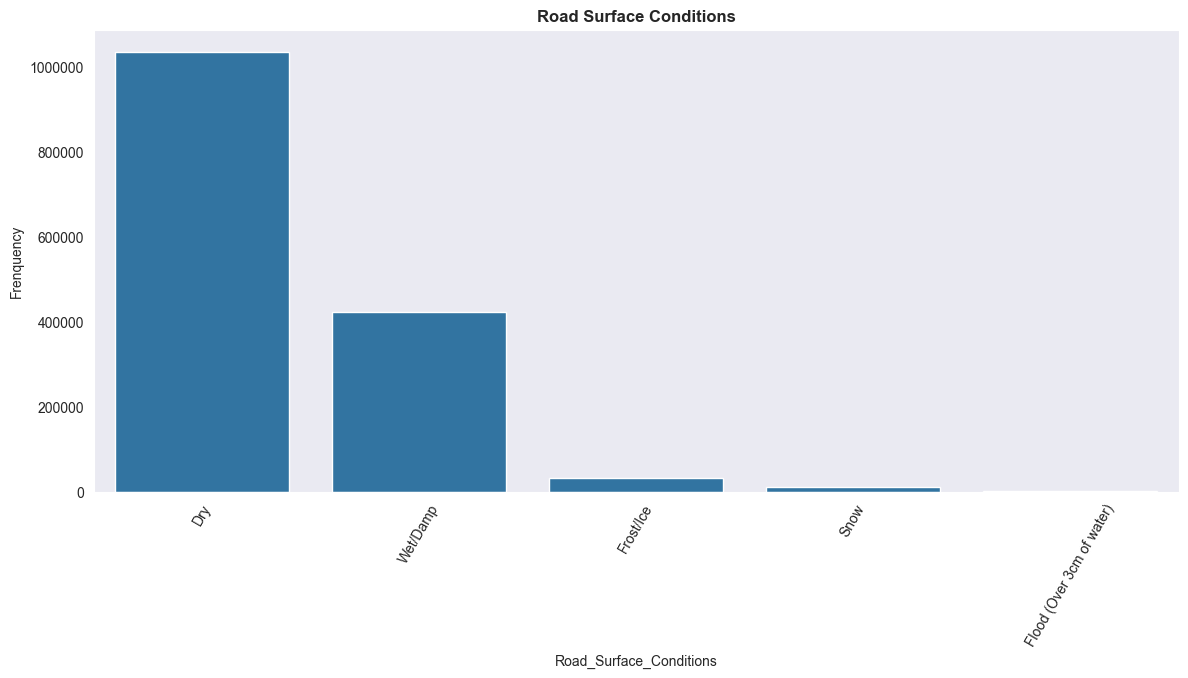

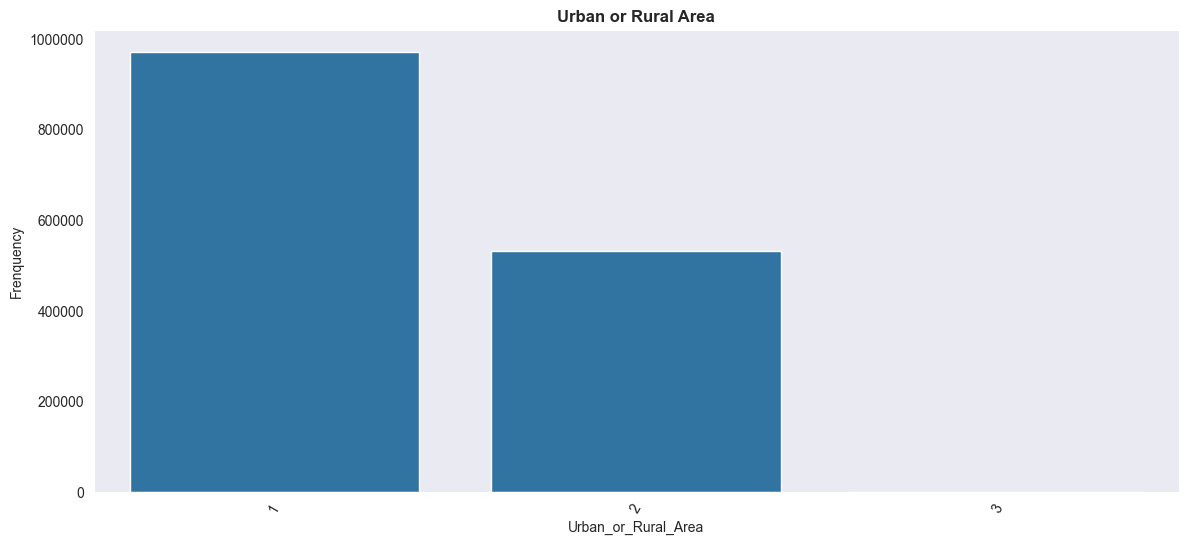

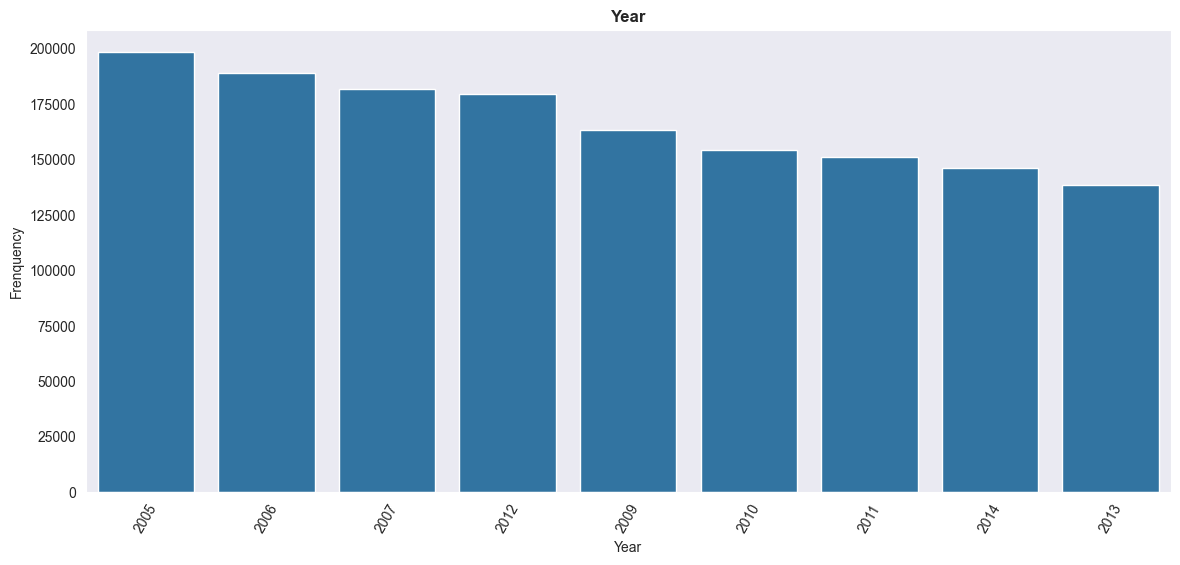

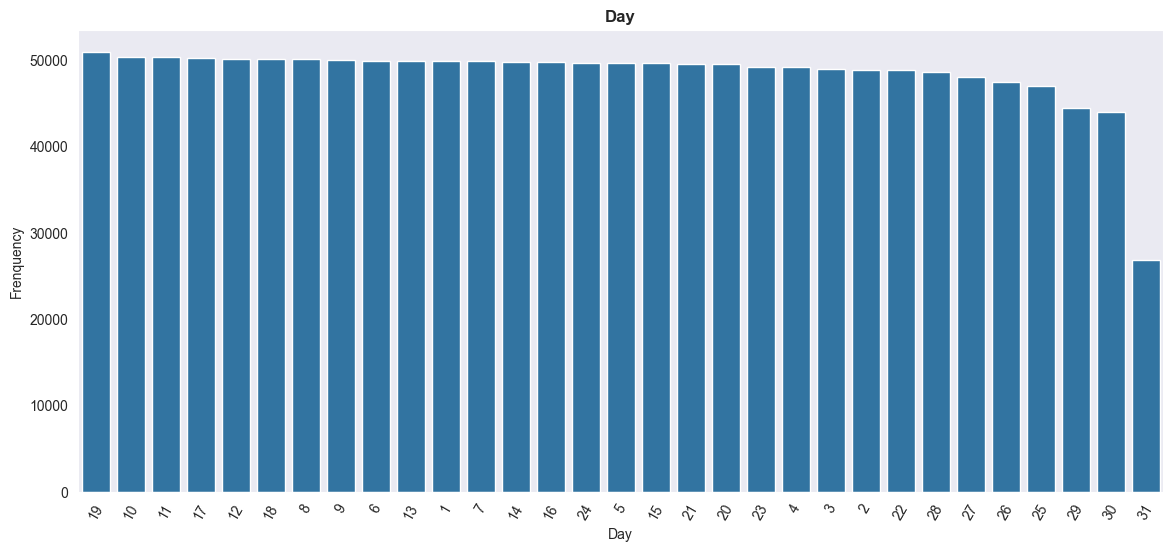

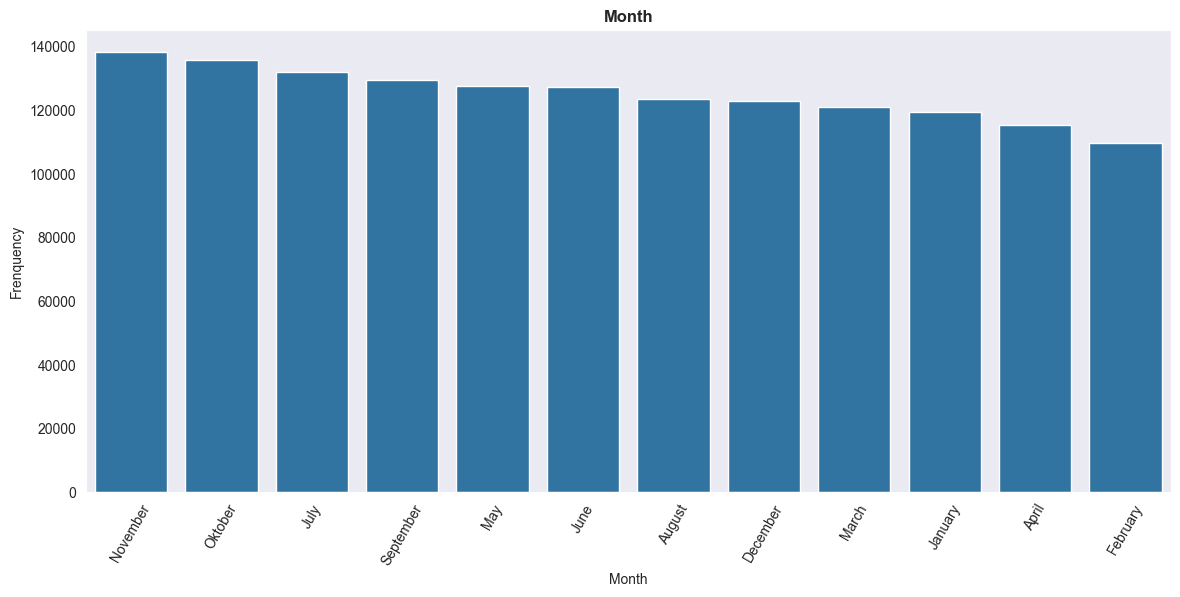

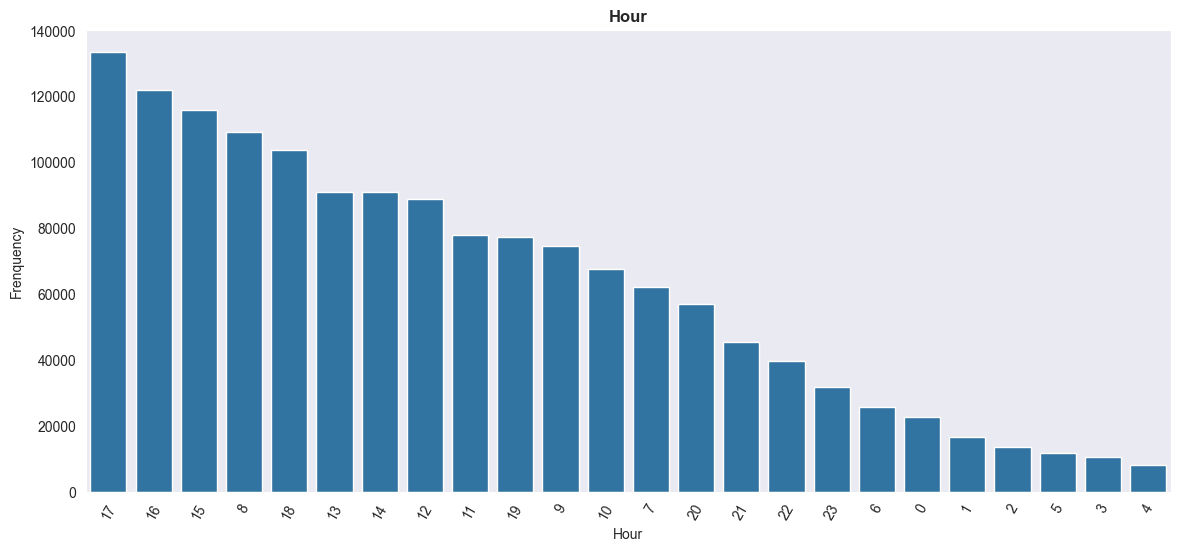

In [25]:
def plot_features(df):
	for feature in df.columns:
		var_value = df[feature].value_counts()

		plt.figure(figsize=(14, 6))
		plt.grid(False)

		sns.barplot(x= var_value.index, y= var_value, order= var_value.index)

		plt.title(" ".join(feature.split("_")), weight= "bold")
		plt.ylabel("Frenquency")
		plt.xticks(rotation= 60)
		plt.ticklabel_format(style= "plain", axis= 'y')

		plt.show()

plot_features(df)

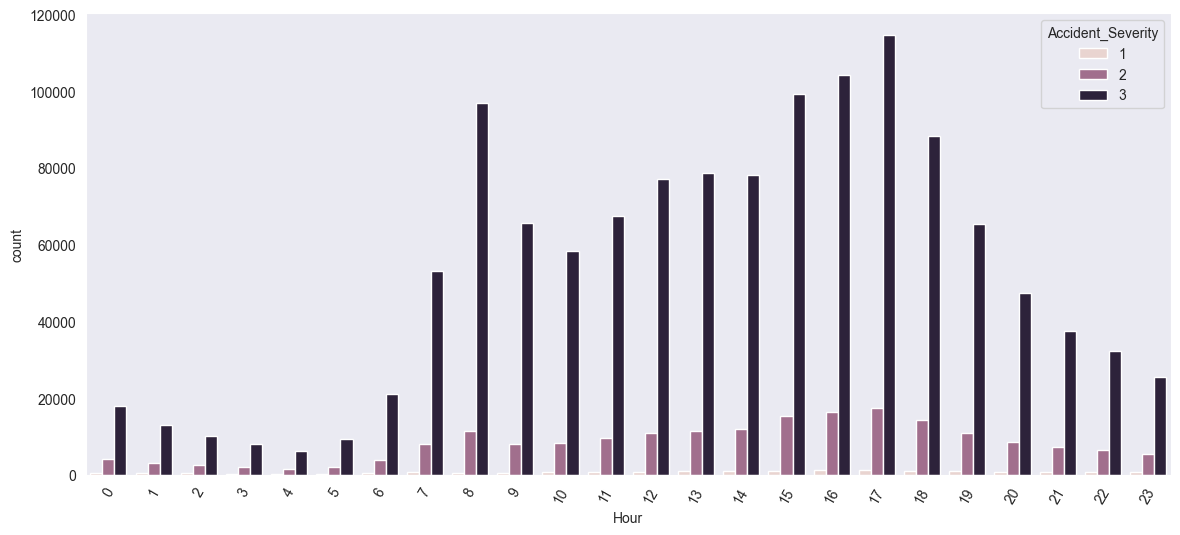

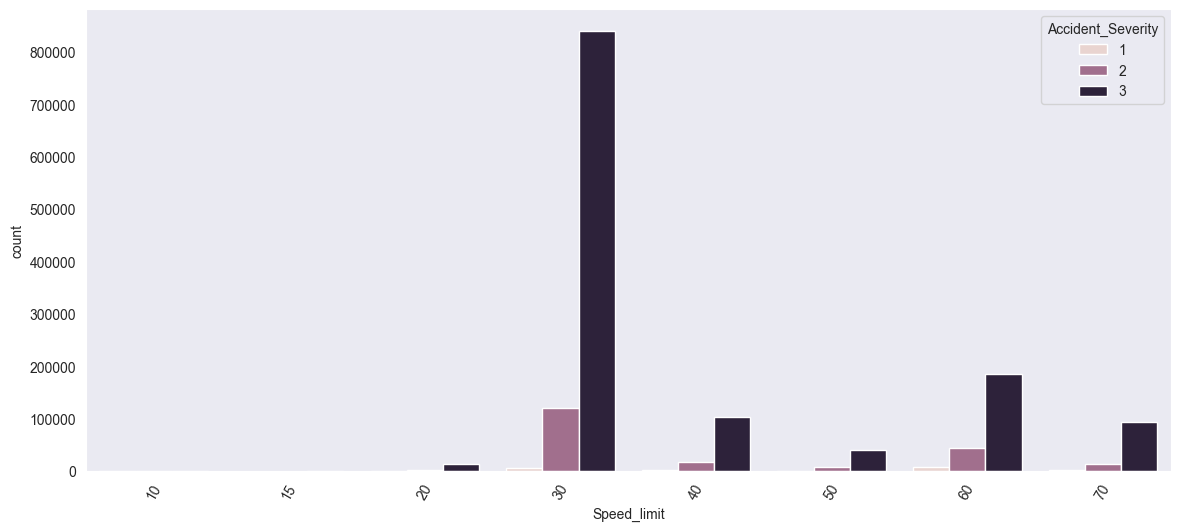

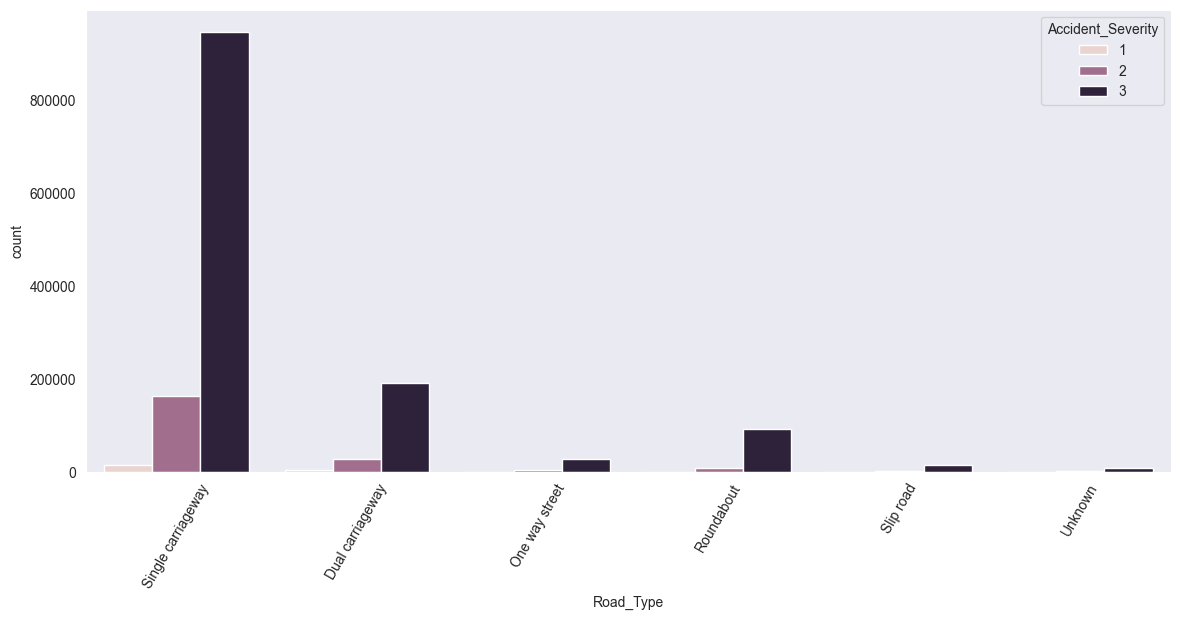

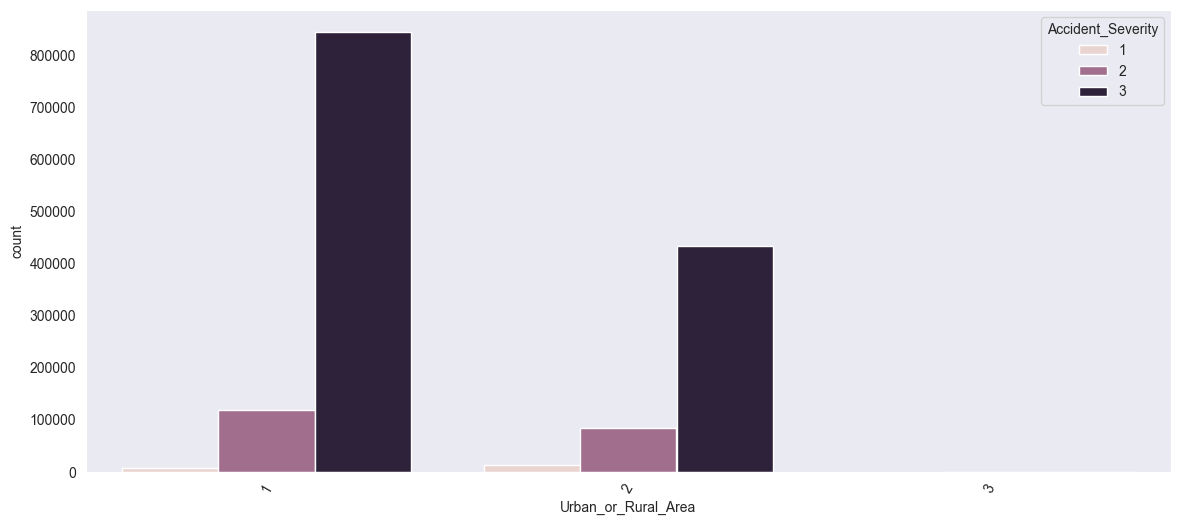

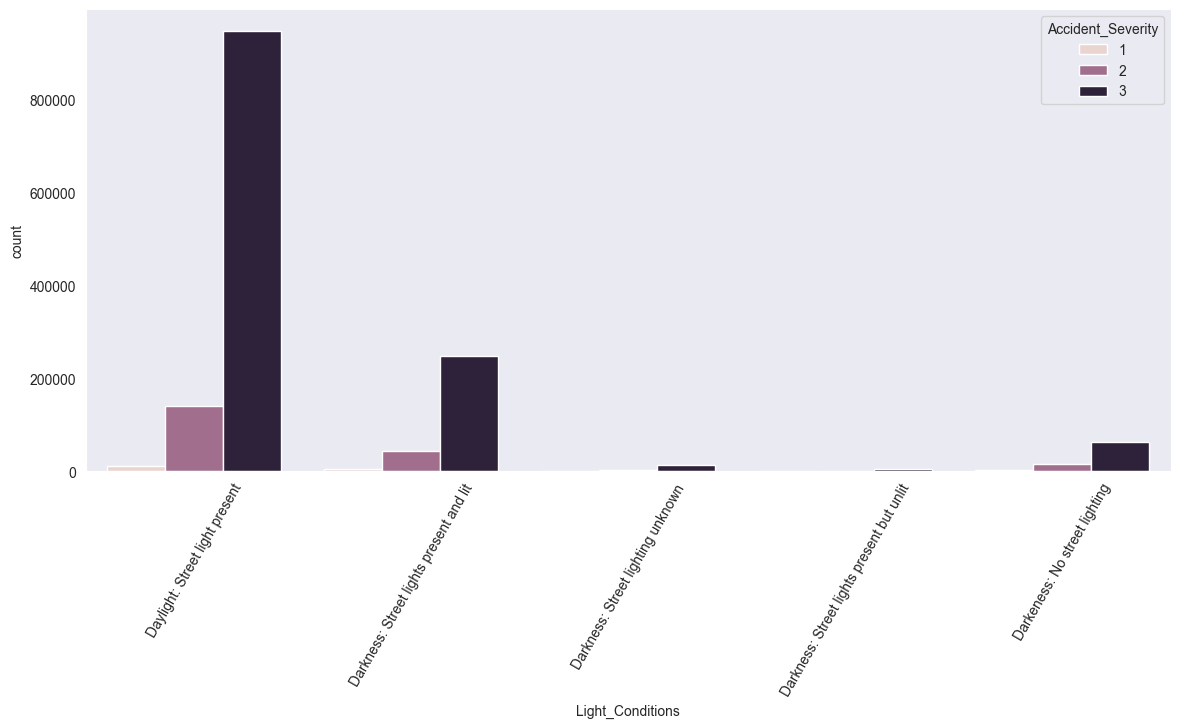

In [28]:
# accident severity
features = ["Hour", "Speed_limit", "Road_Type", "Urban_or_Rural_Area", "Light_Conditions"]

for feature in features:
	plt.figure(figsize= (14, 6))
	plt.grid(False)

	sns.countplot(x= df[feature], hue= "Accident_Severity", data= df)

	plt.xticks(rotation= 60)
	plt.show()

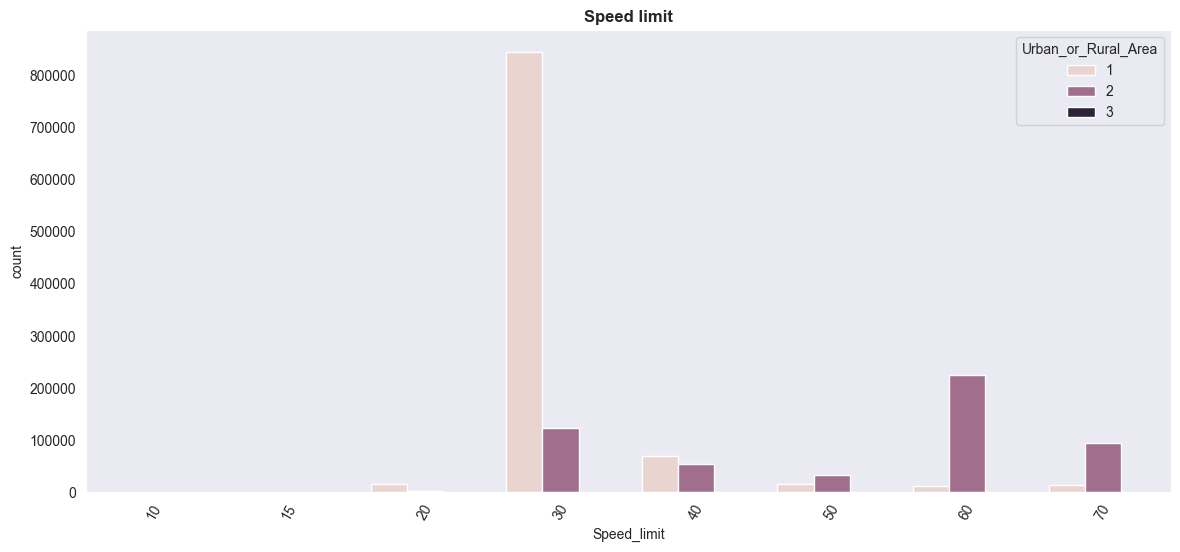

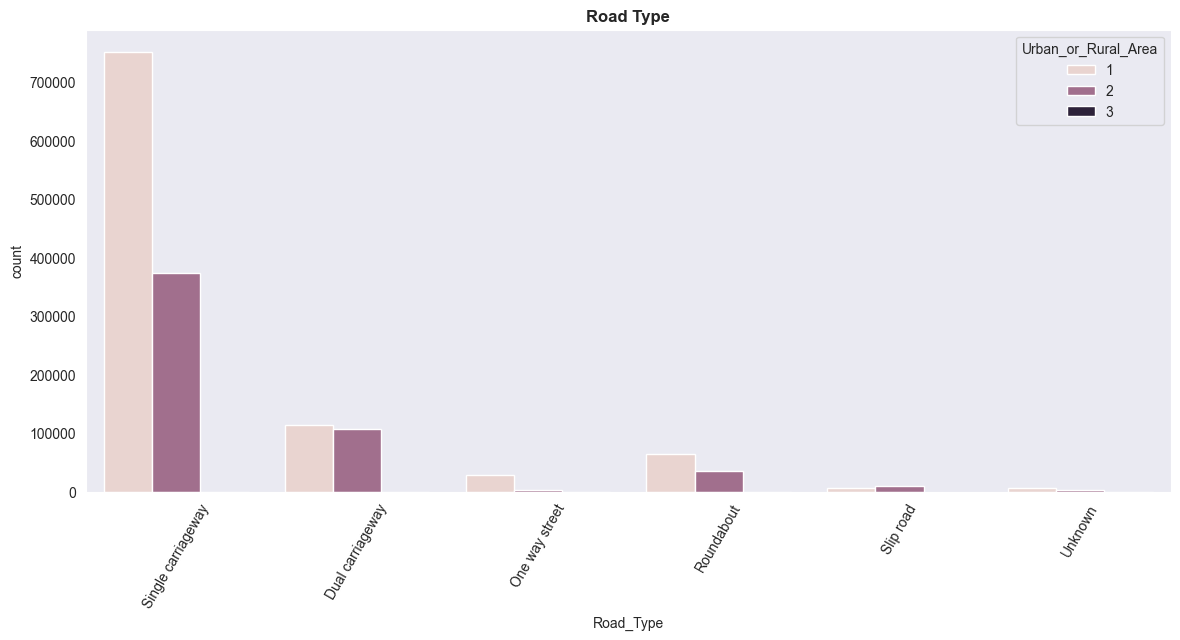

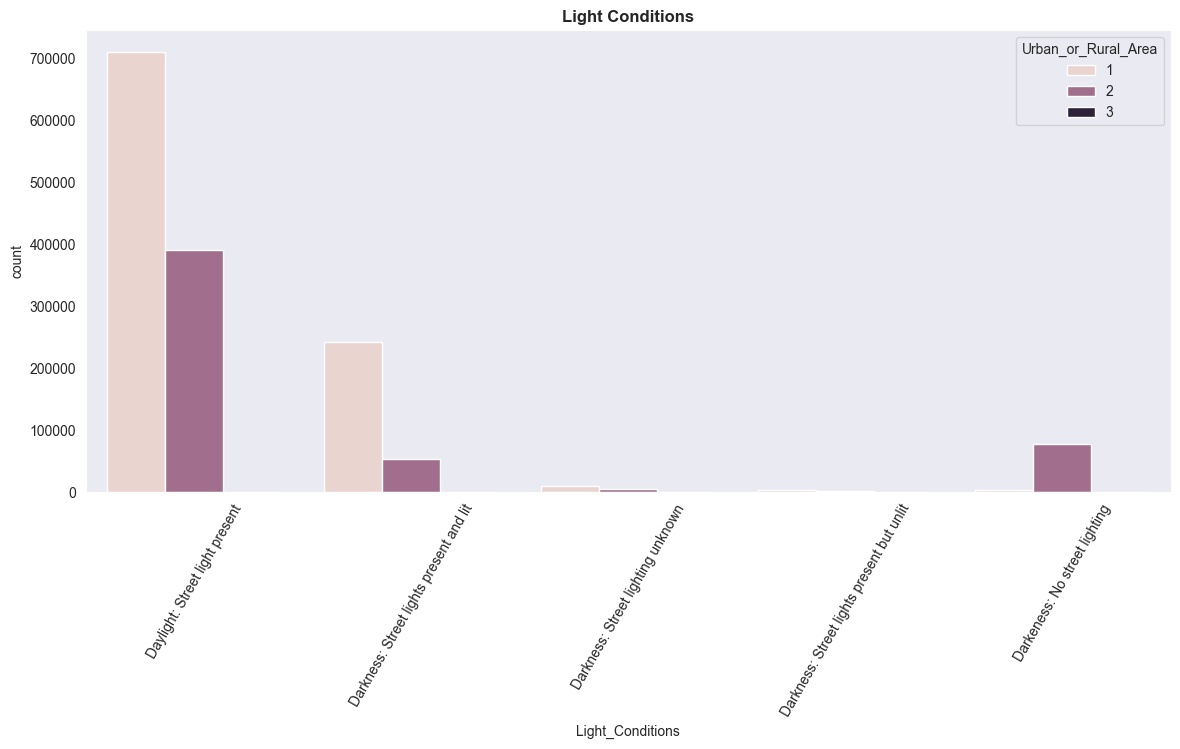

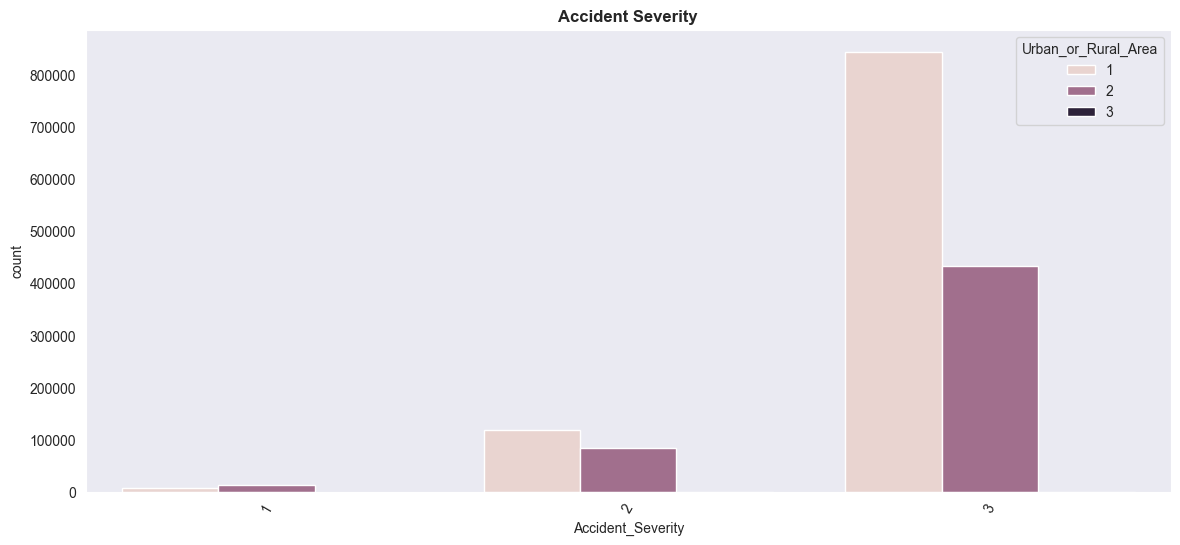

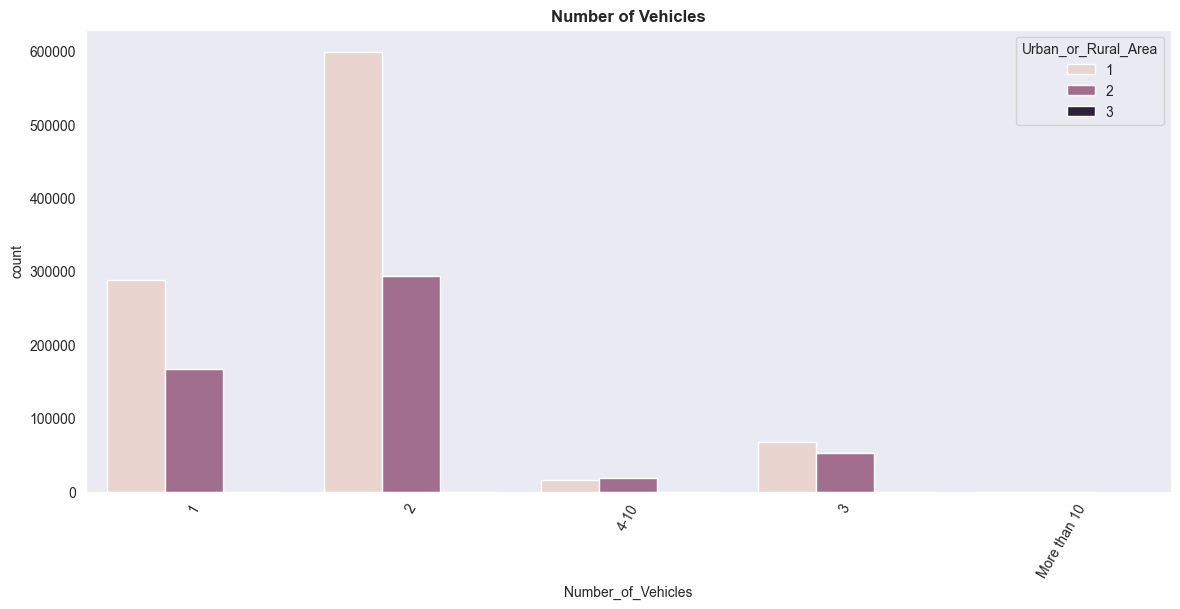

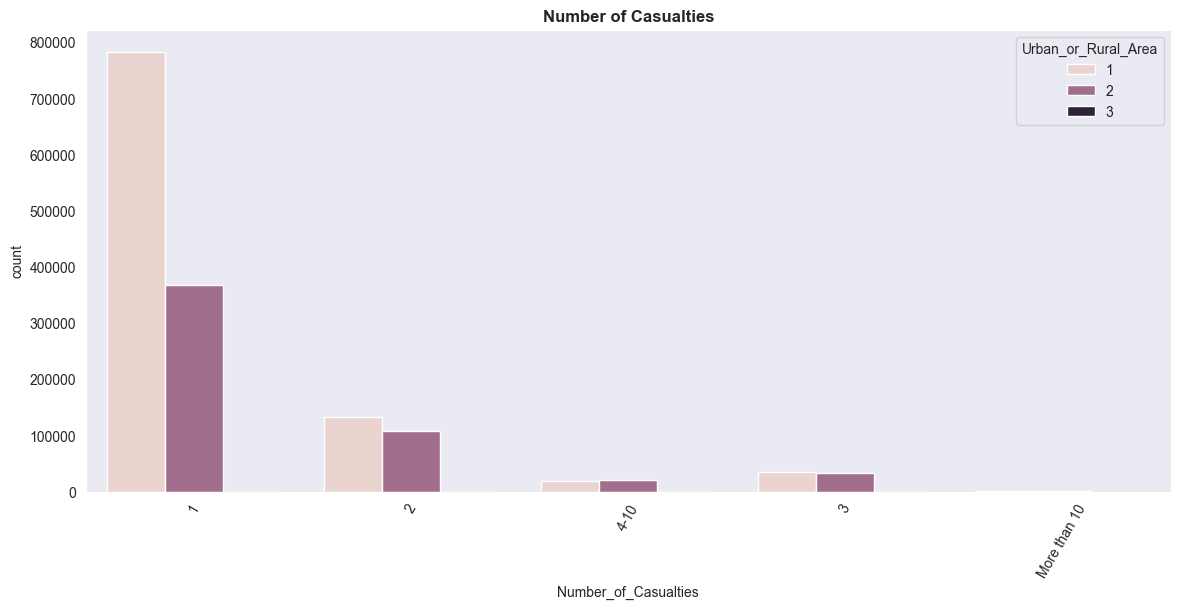

In [32]:
# urban or rural area
features = ["Speed_limit", "Road_Type", "Light_Conditions", "Accident_Severity",
			"Number_of_Vehicles", "Number_of_Casualties"]

for feature in features:
	plt.figure(figsize= (14, 6))
	plt.grid(False)

	sns.countplot(x= df[feature], hue= "Urban_or_Rural_Area", data= df)

	plt.title(" ".join(feature.split('_')), weight= "bold")
	plt.xticks(rotation= 60)
	plt.show()

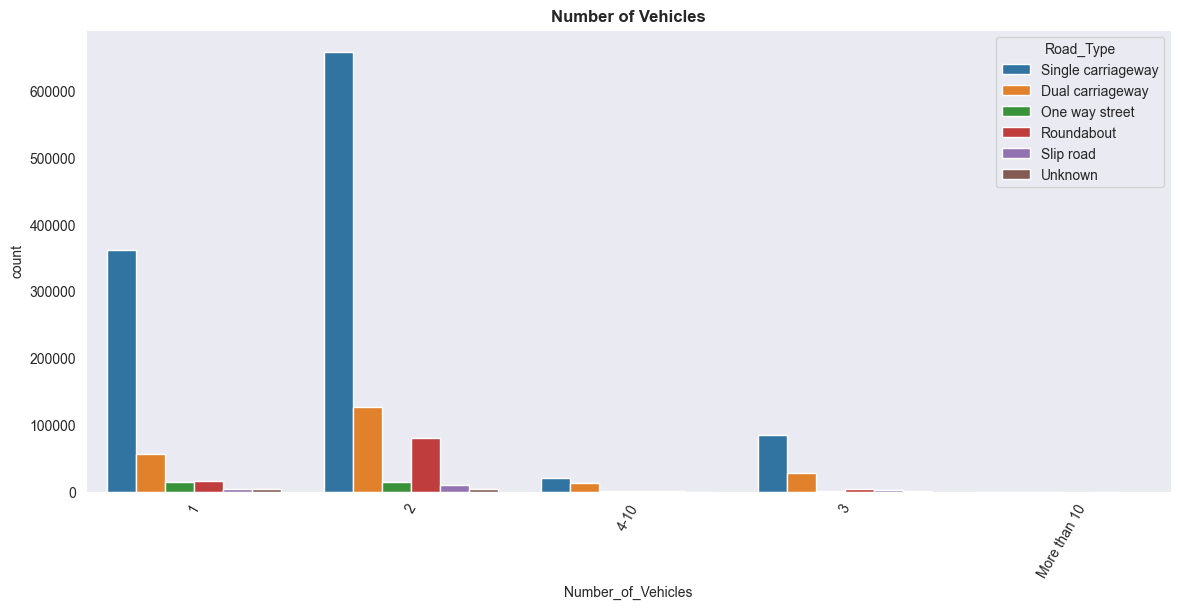

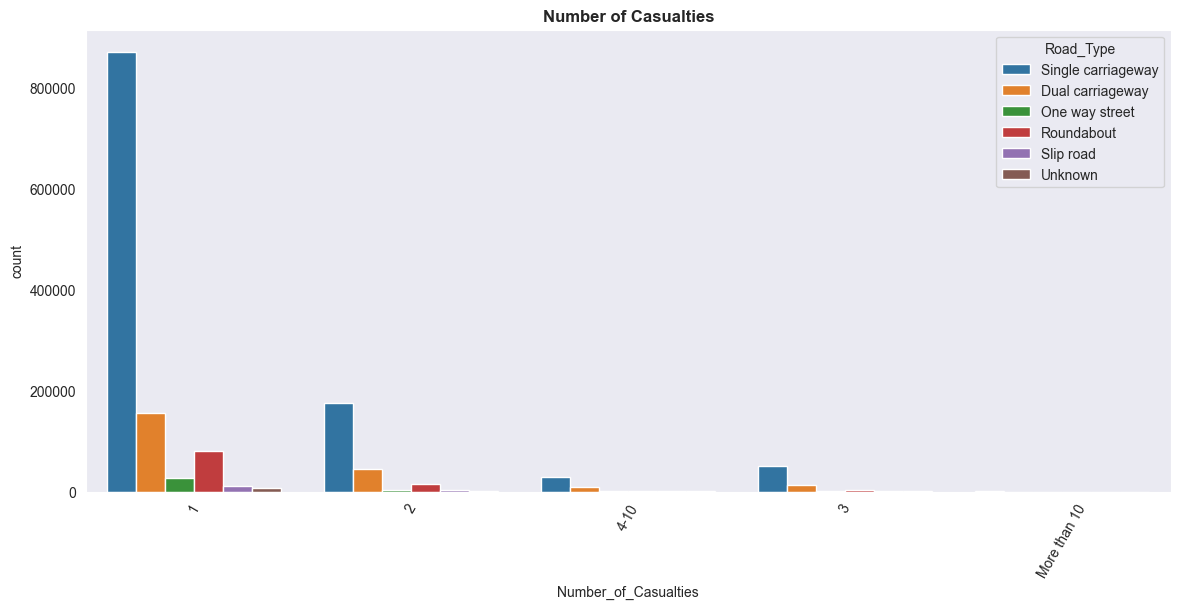

In [33]:
# road type
features = ["Number_of_Vehicles", "Number_of_Casualties"]

for feature in features:
	plt.figure(figsize= (14, 6))
	plt.grid(False)

	sns.countplot(x= df[feature], hue= "Road_Type", data= df)

	plt.title(" ".join(feature.split('_')), weight= "bold")
	plt.xticks(rotation= 60)
	plt.show()